In [ ]:
import numpy as np
from matplotlib import mlab

def compute_spectrogram(sequence, Fs, n_channels):
    """Calcula espectrogramas para cada canal de uma sequência."""
    spectrograms = []
    for k in range(n_channels):
        # Calcula o espectrograma para o canal k
        S, _, _ = mlab.specgram(
            x=sequence[:, k],
            NFFT=128,
            Fs=Fs,
            noverlap=127,
            scale_by_freq=True,
            sides='twosided'
        )
        # Remove a última coluna e transpoe
        spectrograms.append(S[:, :-1].T)
    
    # Empilha os espectrogramas ao longo da terceira dimensão
    return np.dstack(spectrograms)

def spectrogram_multiD_rewritten(frames_set, Fs):
    """Calcula espectrogramas para um conjunto de sequências multidimensionais."""
    n_channels = frames_set.shape[2]
    features = []
    
    for sequence in frames_set:
        # Processa cada sequência
        print(f"sequence.shape = {sequence.shape}")
        spectrogram = compute_spectrogram(sequence, Fs, n_channels)
        features.append(spectrogram)
    
    return np.array(features)

In [ ]:
frames_set[0]

array([[ 0.00000000e+00,  9.93428306e-02],
       [ 3.09316061e-01,  5.60641105e-01],
       [ 5.88293965e-01,  1.08098218e+00],
       ...,
       [-5.88293965e-01, -8.23275902e-01],
       [-3.09316061e-01, -7.02529763e-01],
       [ 1.96438672e-15,  1.14516556e-01]])

frames_set.shape = (3, 1000, 2)


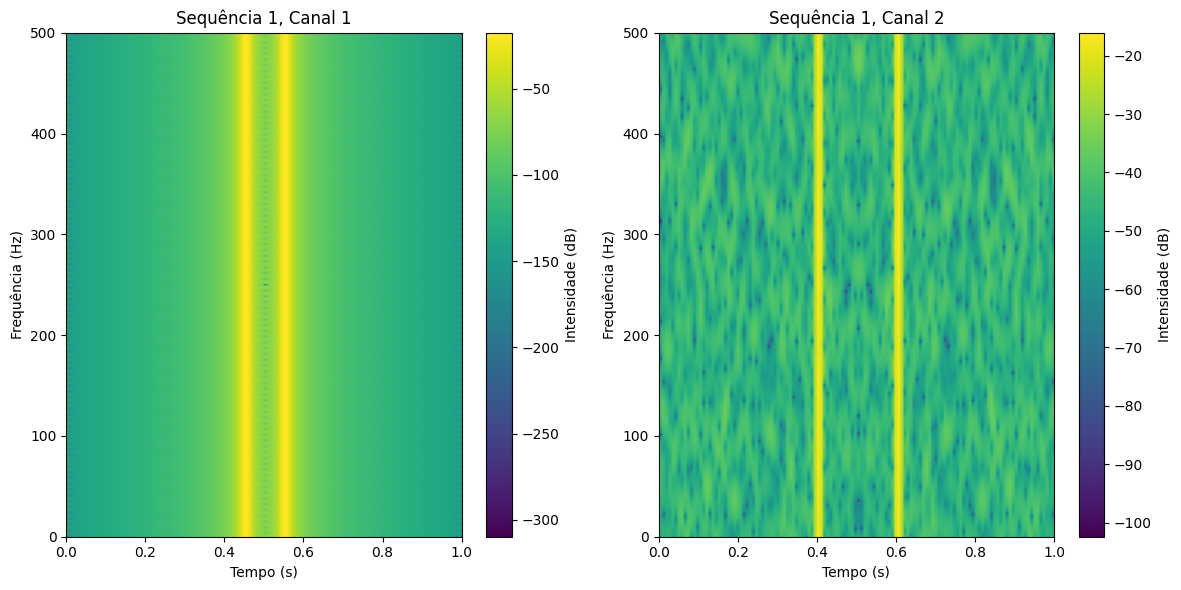

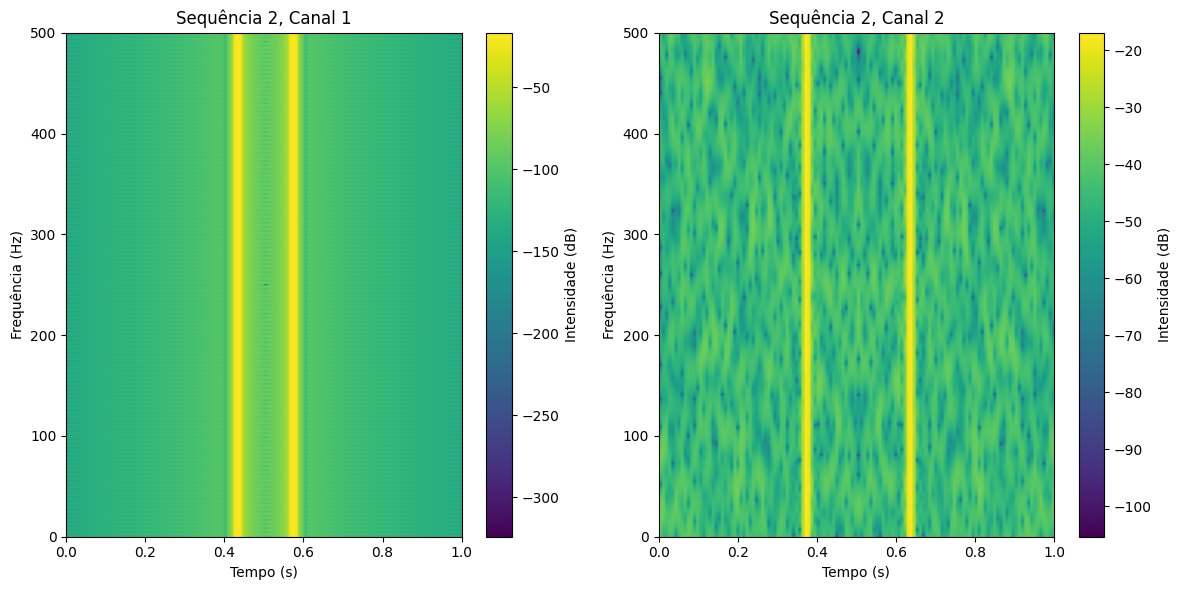

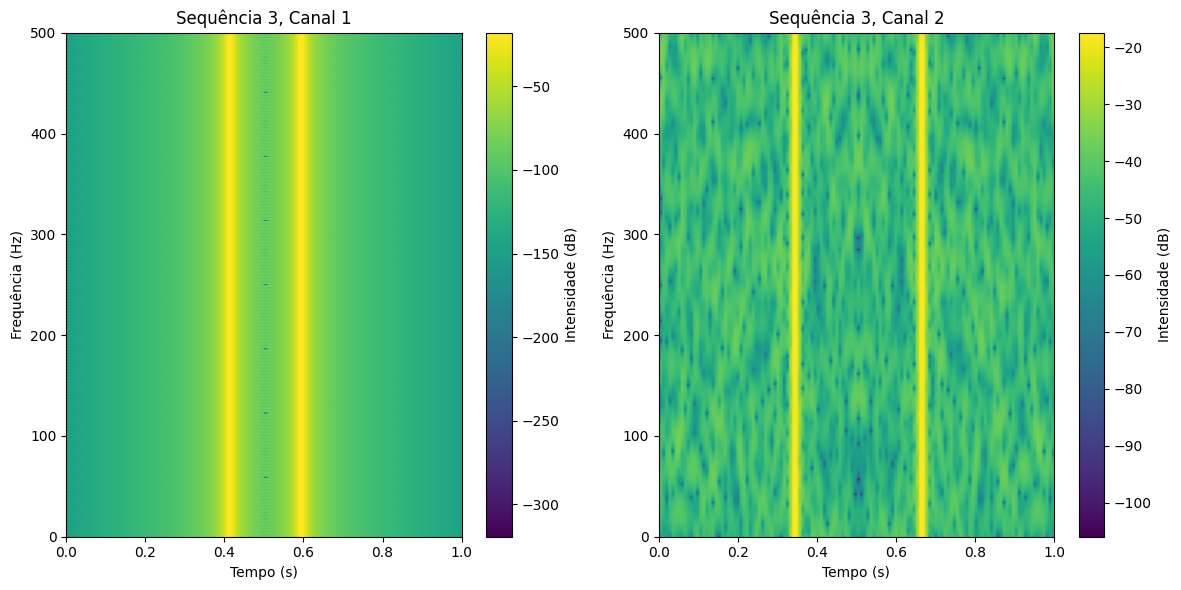

In [9]:
import numpy as np
from matplotlib import mlab
import matplotlib.pyplot as plt

# Configurações
Fs = 1000  # Frequência de amostragem (Hz)
n_sequences = 3  # Número de sequências
n_samples = 1000  # Pontos por sequência
n_channels = 2  # Canais por sequência (ex: áudio stereo)

# 1. Gerar dados dummy - sinais senoidais com ruído
np.random.seed(42)
time = np.linspace(0, 1, n_samples)
frames_set = np.zeros((n_sequences, n_samples, n_channels))

for i in range(n_sequences):
    # Canal 0: senoide com frequência variável
    freq = 50 + i*20
    frames_set[i, :, 0] = np.sin(2 * np.pi * freq * time)
    
    # Canal 1: senoide + ruído
    frames_set[i, :, 1] = (np.sin(2 * np.pi * (100 + i*30) * time) + 
                          0.2 * np.random.normal(size=n_samples))

# 2. Calcular espectrogramas (usando a função reescrita)
print(f"frames_set.shape = {frames_set.shape}")
features = spectrogram_multiD_rewritten(frames_set, Fs)

# 3. Visualizar resultados
for seq_idx in range(n_sequences):
    plt.figure(figsize=(12, 6))
    
    for ch_idx in range(n_channels):
        plt.subplot(1, n_channels, ch_idx + 1)
        plt.imshow(10 * np.log10(features[seq_idx, :, :, ch_idx]), 
                  aspect='auto', origin='lower',
                  extent=[0, 1, 0, Fs/2])
        plt.colorbar(label='Intensidade (dB)')
        plt.title(f'Sequência {seq_idx+1}, Canal {ch_idx+1}')
        plt.xlabel('Tempo (s)')
        plt.ylabel('Frequência (Hz)')
    
    plt.tight_layout()
    plt.show()